# Customer Churn Predicition

## Business Objective
Customer churn is a major challenge in the telecom industry.
The objective of this project is to analyze customer behavior,
identify key drivers of churn, and build machine learning models
to predict customers who are likely to churn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Manipulation

In [14]:
#Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:,5]
customer_5

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [15]:
#Extract the 15th column and store it in ‘customer_15’
customer_15 = df.iloc[:,15]
customer_15

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [16]:
#Extract all the male senior citizens whose payment method is electronic check 
#and store the result in ‘senior_male_electronic’.

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [19]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [20]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [21]:
senior_male_electronic=df[(df.gender=='Male')&(df.SeniorCitizen==1 )&(df.PaymentMethod=='Electronic check ' )]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [22]:
#Extract all those customers whose tenure is greater than 70 months or their monthly 
#charges is more than $100 and store the result in ‘customer_total_tenure’.

In [23]:
df.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [24]:
df.MonthlyCharges.value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [25]:
customer_total_tenure=df[(df.tenure>=70) | (df.MonthlyCharges>=100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [26]:
#Extract all the customers whose contract is of two years, payment method is mailed check
#and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

In [27]:
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [28]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [29]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [30]:
two_mail_yes=df[(df.Contract=="Two year") & (df.PaymentMethod=='Mailed check') & (df.Churn=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [31]:
#Extract 333 random records from the customer_churn dataframe and 
#store the result in ‘customer_333’.
customer_333=df.sample(333)  # also called as random sampling
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5937,5383-MMTWC,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.00,613.4,Yes
2374,9101-NTIXF,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,50.6,No
3045,9114-AAFQH,Female,0,Yes,No,48,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,65.65,3094.65,No
6317,7493-TPUWZ,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,79.15,Yes
1471,9777-WJJPR,Male,0,Yes,No,31,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Credit card (automatic),88.65,2683.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,5656-MJEFC,Male,0,Yes,Yes,42,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),48.15,2032.3,No
701,9450-TRJUU,Male,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,83.15,2848.45,No
6524,2754-VDLTR,Male,0,No,Yes,10,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,95.20,930.4,Yes
6632,9259-PACGQ,Female,0,Yes,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,62.65,2274.9,Yes


In [32]:
#Get the count of different levels from the ‘Churn’ column.
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Data Visualization

Build a bar-plot for the ’InternetService’ column:
   a. Set x-axis label to ‘Categories of Internet Service’.
   b. Set y-axis label to ‘Count of Categories’.
   c. Set the title of plot to be ‘Distribution of Internet Service’.
   d. Set the color of the bars to be ‘orange’


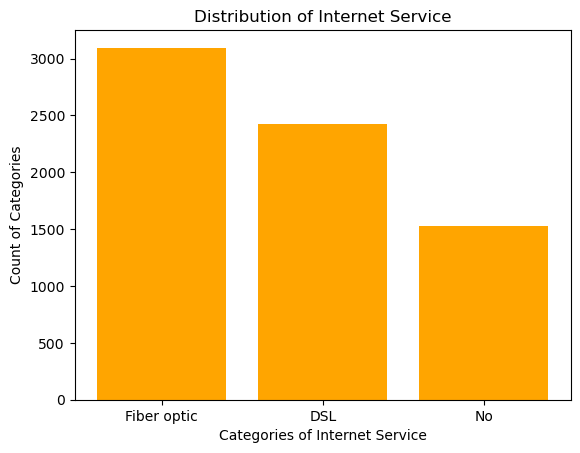

In [33]:
import matplotlib.pyplot as plt

# Count categories in InternetService column
counts = df['InternetService'].value_counts()

# Create bar plot
plt.figure()
plt.bar(counts.index, counts.values, color='orange')

# Labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

# Show plot
plt.show()


Build a histogram for the ‘tenure’ column:
   a. Set the number of bins to be 30.
   b. Set the color of the bins to be ‘green’.
   c. Assign the title ‘Distribution of tenure’.


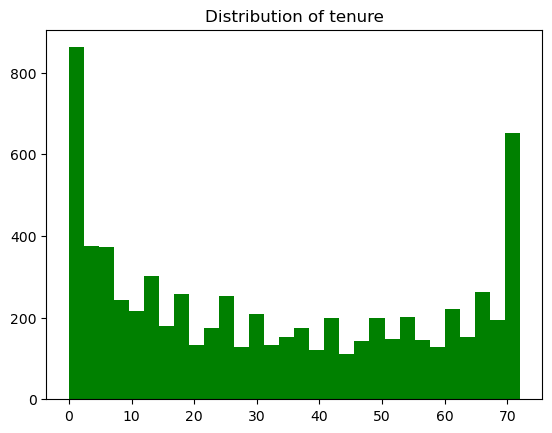

In [34]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure()
plt.hist(df['tenure'], bins=30, color='green')

# Title
plt.title('Distribution of tenure')

# Show plot
plt.show()


Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
   a. Assign the points a color of ‘brown’.
   b. Set the x-axis label to ‘Tenure of customer’.
   c. Set the y-axis label to ‘Monthly Charges of customer’.
   d. Set the title to ‘Tenure vs Monthly Charges’.
   e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.


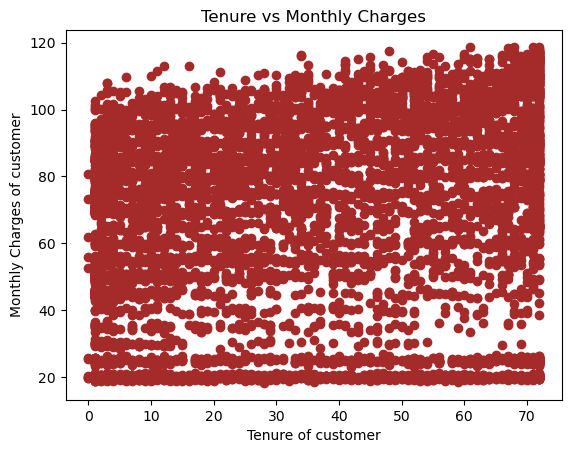

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')

plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

plt.show()


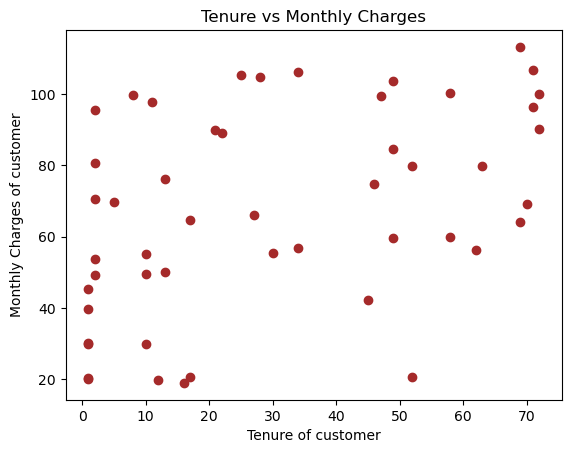

In [36]:
x=df['tenure'].head(50)
y=df['MonthlyCharges'].head(50)
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.scatter(x,y,color='brown')
plt.show()

<Figure size 640x480 with 0 Axes>

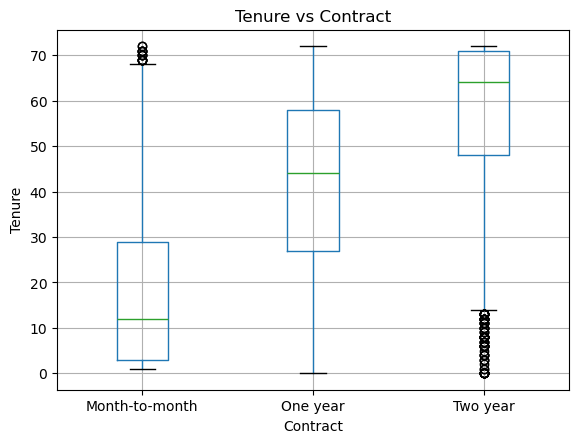

In [97]:
plt.figure()
df.boxplot(column='tenure', by='Contract')

plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.suptitle('')  # Removes automatic pandas title

plt.show()


## ML Modeling

In [98]:
df['Churn'].value_counts(normalize=True)


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Observation:
The dataset is imbalanced, with fewer churned customers.
Hence accuracy alone is not sufficient for evaluation.


1. Linear Regression:
● Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
   a. Divide the dataset into train and test sets in 70:30 ratio.
   b. Build the model on train set and predict the values on test set.
   c. After predicting the values, find the root mean square error.
   d. Find out the error in prediction & store the result in ‘error’.
   e. Find the root mean square error.


In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [39]:
X = df[['tenure']]              # Independent variable
y = df['MonthlyCharges']        # Dependent variable


In [45]:
X

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [46]:
y

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred


array([55.10659011, 67.43520921, 70.82557946, ..., 73.29130328,
       60.96268418, 61.57911514])

In [44]:
error = y_test - y_pred
error

185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
          ...    
5522    15.043410
6377   -10.456590
5500   -12.791303
2392    29.737316
6705   -10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", rmse)


Root Mean Square Error: 29.07936015646814


In [48]:
error=sum((y_pred)-(y_test))
print(f"error in prediction={error}")

error in prediction=98.39924336537348


2. Logistic Regression:
● Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
   a. Divide the dataset in 65:35 ratio.
   b. Build the model on train set and predict the values on test set.
   c. Build the confusion matrix and get the accuracy score.
   


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])


In [50]:
x1=pd.DataFrame(df['MonthlyCharges'])
y1=df['Churn']

In [51]:
x1

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [52]:
y1

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=0.65,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4577, 1)
(4577,)
(2466, 1)
(2466,)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [55]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred=model.predict(x_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
acc_log = accuracy_score(y_test, y_pred)

print("Accuracy (Simple Logistic Regression):", acc_log)

Accuracy (Simple Logistic Regression): 0.7605300520586843


In [59]:
print("confusion matrix")
print(confusion_matrix(y_test,y_pred))

confusion matrix
[[1815    0]
 [ 651    0]]


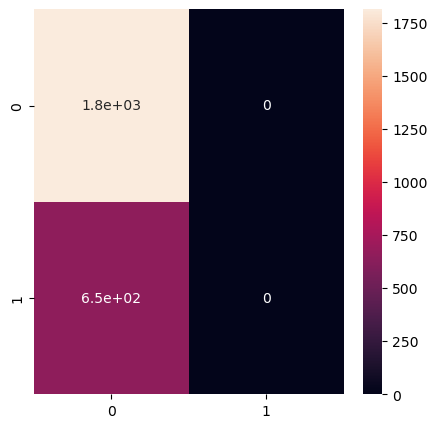

In [60]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2g',linecolor='green')
plt.show()

 Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’.
   e. Divide the dataset in 80:20 ratio.
   f. Build the model on train set and predict the values on test set.
   g. Build the confusion matrix and get the accuracy score.

In [61]:
X2 = df[['tenure', 'MonthlyCharges']]
y2 = df['Churn']


In [63]:
X2

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [64]:
y2

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [65]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.20, random_state=42
)

In [66]:
X2_train, X2_test, y2_train, y2_test

(      tenure  MonthlyCharges
 2142      21           64.85
 1623      54           97.20
 6074       1           23.45
 1362       4           70.20
 6754       0           61.90
 ...      ...             ...
 3772       1           95.00
 5191      23           91.10
 5226      12           21.15
 5390      12           99.45
 860       26           19.80
 
 [5634 rows x 2 columns],
       tenure  MonthlyCharges
 185        1           24.80
 2715      41           25.25
 3825      52           19.35
 1807       1           76.35
 132       67           50.55
 ...      ...             ...
 6366      64           68.30
 315       51          110.05
 2439      17           19.90
 5002      69           43.95
 1161       1           31.35
 
 [1409 rows x 2 columns],
 2142    0
 1623    0
 6074    1
 1362    1
 6754    0
        ..
 3772    1
 5191    0
 5226    0
 5390    1
 860     0
 Name: Churn, Length: 5634, dtype: int32,
 185     1
 2715    0
 3825    0
 1807    1
 132     0
      

In [67]:
log_model2 = LogisticRegression()
log_model2.fit(X2_train, y2_train)
log_model2

LogisticRegression()

In [68]:
y2_pred = log_model2.predict(X2_test)
y2_pred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
cm2 = confusion_matrix(y2_test, y2_pred)
acc2 = accuracy_score(y2_test, y2_pred)

print("Confusion Matrix (Multiple Logistic):\n", cm2)
print("Accuracy Score:", acc2)


Confusion Matrix (Multiple Logistic):
 [[944  92]
 [193 180]]
Accuracy Score: 0.7977288857345636


3. Decision Tree:
● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
   a. Divide the dataset in 80:20 ratio.
   b. Build the model on train set and predict the values on test set.
   c. Build the confusion matrix and calculate the accuracy.


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [71]:
X = df[['tenure']]   # Independent variable
y = df['Churn']      # Dependent variable


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [73]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_model


DecisionTreeClassifier(random_state=42)

In [75]:
y_pred = dt_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [90]:
cm = confusion_matrix(y_test, y_pred)
acc_dt = accuracy_score (y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc_dt )


Confusion Matrix:
 [[1341  198]
 [ 308  266]]
Accuracy Score: 0.7605300520586843


4. Random Forest:
● Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
   a. Divide the dataset in 70:30 ratio.
   b. Build the model on train set and predict the values on test set.
   c. Build the confusion matrix and calculate the accuracy.



In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [78]:
X = df[['tenure', 'MonthlyCharges']]   # Independent variables
y = df['Churn']                        # Dependent variable


In [79]:
X

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [81]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_model


RandomForestClassifier(random_state=42)

In [82]:
y_pred = rf_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [95]:
cm = confusion_matrix(y_test, y_pred)
acc_rf = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc_rf)


Confusion Matrix:
 [[1341  198]
 [ 308  266]]
Accuracy Score: 0.7605300520586843


<Axes: title={'center': 'Feature Importance'}>

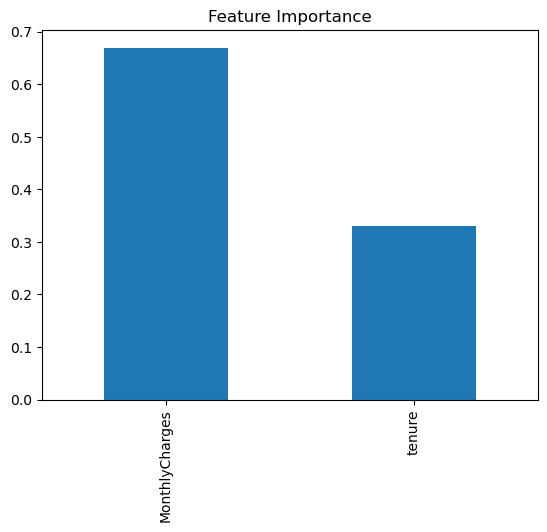

In [84]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', title='Feature Importance')


In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1539
           1       0.57      0.46      0.51       574

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



In [96]:
model_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [acc_log, acc_dt, acc_rf]
})

model_scores


,Model,Accuracy
0,Logistic Regression,0.76053
1,Decision Tree,0.76053
2,Random Forest,0.76053


## Final Recommendations
- Focus retention efforts on customers with low tenure
- Offer discounts to customers with high monthly charges
- Promote long-term contracts to reduce churn
